In [365]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')
os.chdir('/Users/stella/Library/Mobile Documents/com~apple~CloudDocs/Documents/coursework/Spring Quarter/BAX 453 Application Domain /Assignment')

Build classification machine learning models in Python for diabetes prediction.
1. Complete the Machine Learning Canvas for this business use case. Think creatively. (5 points)
2. Develop ML models in Python, using Jupyter Notebook or any other tool of your choice. Apply LogisticRegression,
SVM, RandomForest classification algorithms. Apply Data Science Process Model as a guide. (10 points)
3. Apply GridSearchCV to find the best hyperparameters for your models. (2 points)
4. Assess model performance (confusion matrix, precision, recall, ROC AUC) and interpret performance from business
impact viewpoint (false negatives vs false positives). (3 points)

### read data

In [18]:
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### data wrangling

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [63]:
data.isnull().sum()
#no missing values 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [141]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [215]:
#drop 0 values of BMI, BloodPressure from dataset because they 
data=data[data['BMI']!=0].dropna()
data=data[data['BloodPressure']!=0].dropna()

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000
mean,3.858711,121.046639,72.367627,21.499314,83.946502,32.469959,0.474117,33.318244,0.344307
std,3.357468,32.255215,12.375838,15.708376,116.803000,6.885098,0.331649,11.753078,0.475468
min,0.000000,0.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,46.000000,32.400000,0.378000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,130.000000,36.600000,0.627000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [49]:
# X variables, excluding the 'Outcome' which is our Y variable
X = data.drop(['Outcome'], axis = 1)
Y = data['Outcome']
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [216]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Intercept'],
      dtype='object')

In [217]:
#data normalization z=(x-x_min)/(x_max-x_min)
X_scaled = (X - np.min(X))/(np.max(X) - np.min(X))
X_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Intercept
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,NaN
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,NaN
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,NaN
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,NaN
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,NaN


In [218]:
#variable selection using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_scaled['Intercept'] = 1
vif = pd.DataFrame()
vif['variables'] = X.columns
vif["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
print(vif)

#No collinearity exisits based on the dataset, no variables needed to be droped 

                  variables        VIF
0               Pregnancies   1.430872
1                   Glucose   1.298961
2             BloodPressure   1.181863
3             SkinThickness   1.507432
4                   Insulin   1.427536
5                       BMI   1.297450
6  DiabetesPedigreeFunction   1.067090
7                       Age   1.588368
8                 Intercept  33.478638


## EDA

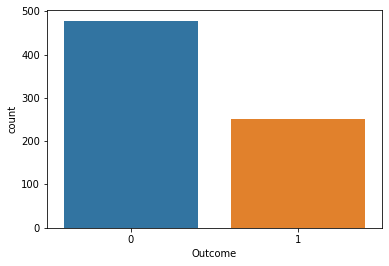

In [219]:
#how many people have diabetes in this dataset 
#number of people with diabetes are less that thoes who don't 
sns.countplot(data['Outcome'])

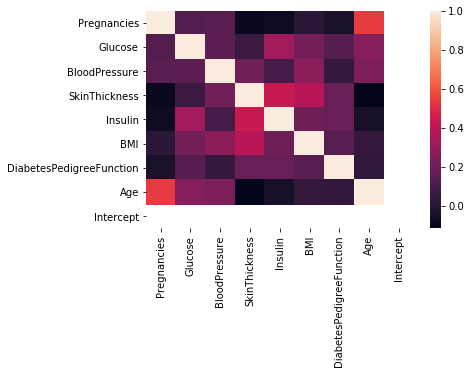

In [135]:
#heatmap
#High correlation include:
#Age and Pregancies
#SkinThickness and BMI
#Insulin and SkinThickness 
sns.heatmap(X.corr())

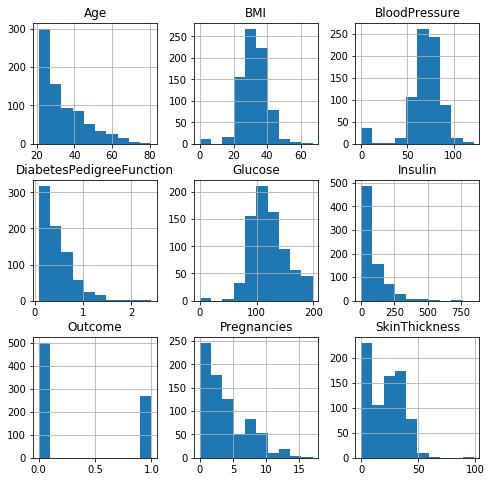

In [139]:
#Histogram of each variable 
data.hist(figsize=(8,8))
plt.show()

####  Train test dataset split
##### train dataset :80%
##### test dataset : 20%

In [77]:
#import packages 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 9)
(154, 9)
(614,)
(154,)


### Logistic Regression

In [220]:
from sklearn.linear_model import LogisticRegression
import sklearn
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/stella/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [221]:
predict = logmodel.predict(X_test)

In [222]:
from sklearn.metrics import classification_report,confusion_matrix

In [223]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        99
           1       0.74      0.58      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



In [224]:
#assess model performance
print("Accuracy on training set: {:.2f}".format(logmodel.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(logmodel.score(X_test, y_test)))

Accuracy on training set: 0.75
Accuracy on test set: 0.78


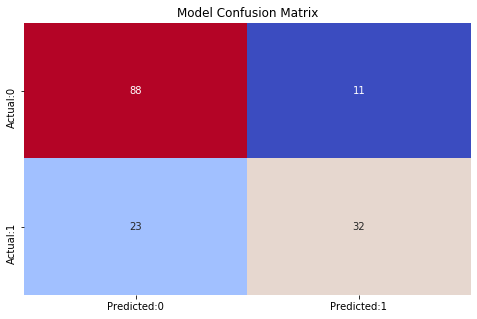

In [225]:
cm=confusion_matrix(y_test,predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
hm = sns.heatmap(conf_matrix, annot=True,fmt='d',cmap='coolwarm',vmax=50, cbar=False)
hm.set_title("Model Confusion Matrix")
hm

#### Intepretation
##### From the business point of view, we want to minimize the false negative rate, which means that we want to minimize the possibility that when a patient actually has diabtes but we predictied he/she doesn't. This is also the type 2 error. We want to make it low because the consequence is huge that may affect people's health condition.In this case, the false negative rate is 14.94%.

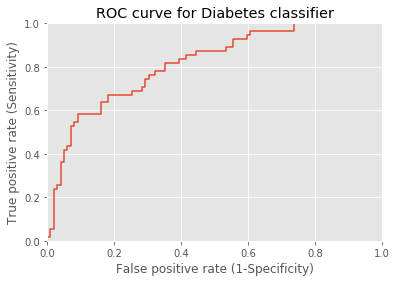

In [369]:
#ROC Curve 
from sklearn.metrics import roc_curve
y_pred_prob_yes=logmodel.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Diabetes classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)


In [370]:
#AUC
metrics.auc(fpr, tpr)

0.8145087235996327

In [348]:
#grid search
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [349]:
print(logreg_cv.best_params_)

{'C': 100.0, 'penalty': 'l1'}


In [350]:
grid_predictions=logreg_cv.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[79 20]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



### SVM

In [316]:
from sklearn.svm import SVC

svc= SVC()
svc.fit(X_train,y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [317]:
predict = svc.predict(X_test)

In [318]:
print(classification_report(y_test, predict_svc))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86        99
           1       0.82      0.56      0.67        55

    accuracy                           0.80       154
   macro avg       0.80      0.75      0.76       154
weighted avg       0.80      0.80      0.79       154



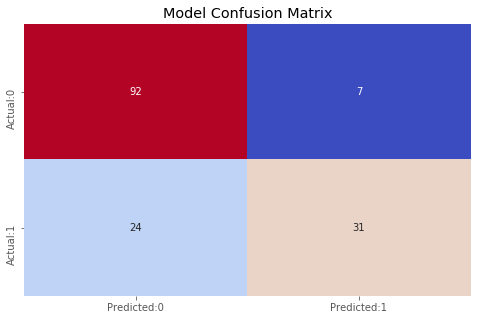

In [319]:
cm=confusion_matrix(y_test,predict_svc)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
hm = sns.heatmap(conf_matrix, annot=True,fmt='d',cmap='coolwarm',vmax=50, cbar=False)
hm.set_title("Model Confusion Matrix")
hm

#### Intepretation
##### From the business point of view, we want to minimize the false negative rate, which means that we want to minimize the possibility that when a patient actually has diabtes but we predictied he/she doesn't. This is also the type 2 error. We want to make it low because the consequence is huge that may affect people's health condition.In this case, the false negative rate is 15.58%.

In [320]:
#assess model performance
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.76
Accuracy on test set: 0.80


In [321]:
#enabling classifier
clf = CalibratedClassifierCV(svc)
from sklearn.calibration import CalibratedClassifierCV
clf.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=SVC(C=1.0, cache_size=200,
                                          class_weight=None, coef0=0.0,
                                          decision_function_shape='ovr',
                                          degree=3, gamma='auto_deprecated',
                                          kernel='rbf', max_iter=-1,
                                          probability=False, random_state=None,
                                          shrinking=True, tol=0.001,
                                          verbose=False),
                       cv='warn', method='sigmoid')

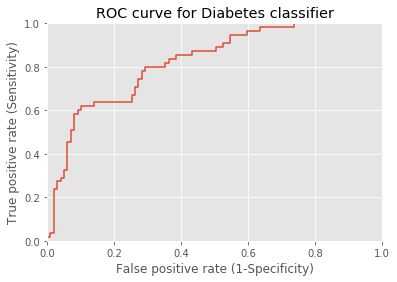

In [367]:
#ROC Curve 
y_pred_prob_yes=clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Diabetes classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [368]:
#AUC
metrics.auc(fpr, tpr)

0.822038567493113

In [325]:
#GridSearch SVC
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
grid.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [326]:
print(grid.best_estimator_)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [328]:
grid_predictions=grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[85 14]
 [20 35]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        99
           1       0.71      0.64      0.67        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.78      0.78      0.78       154



### Random Forest

In [235]:
from sklearn.ensemble import RandomForestClassifier

In [351]:
forest = RandomForestClassifier(n_estimators = 10, random_state = 42) 
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [352]:
predict_f = forest.predict(X_test)

In [353]:
print(classification_report(y_test, predict_f))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



In [354]:
print("Accuracy on training set: {:.2f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.99
Accuracy on test set: 0.77


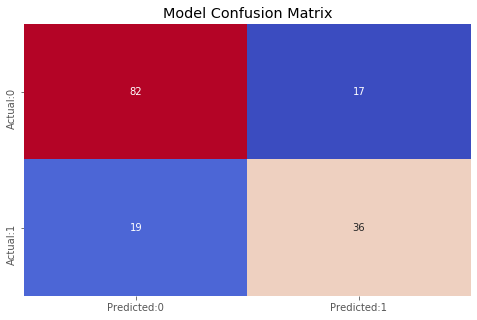

In [355]:
cm=confusion_matrix(y_test,predict_f)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
hm = sns.heatmap(conf_matrix, annot=True,fmt='d',cmap='coolwarm',vmax=50, cbar=False)
hm.set_title("Model Confusion Matrix")
hm

#### Intepretation
##### From the business point of view, we want to minimize the false negative rate, which means that we want to minimize the possibility that when a patient actually has diabtes but we predictied he/she doesn't. This is also the type 2 error. We want to make it low because the consequence is huge that may affect people's health condition.In this case, the false negative rate is 12.34%.

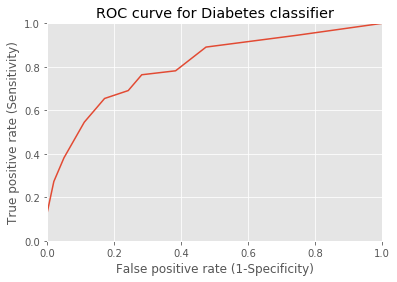

In [363]:
#ROC Curve 
y_pred_prob_yes=forest.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Diabetes classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [366]:
#AUC
metrics.auc(fpr, tpr)

0.8055096418732782

In [357]:
#grid search
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [359]:
GS_RF = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
GS_RF.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={

In [360]:
print(GS_RF.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 500}


In [361]:
grid_predictions=GS_RF.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[81 18]
 [20 35]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        99
           1       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



### In comparison with the evaluation metrics, SVM has the best model precision rate(80%) and the highest AUC(0.82),but random forest has the lowest false negative rate(12.34%) and the highest recall(81% of the actual positives are identified).